Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a **maximum score of 800 points**. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend. 

You have been provided with a dataset called `schools.csv`, which is previewed below.

You have been tasked with answering three key questions about New York City (NYC) public school SAT performance.

In [ ]:
# Re-run this cell 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read in the data
schools = pd.read_csv("schools.csv")

# Preview the data
# schools.head()
# print(schools.columns)

### Which NYC schools have the best math results?

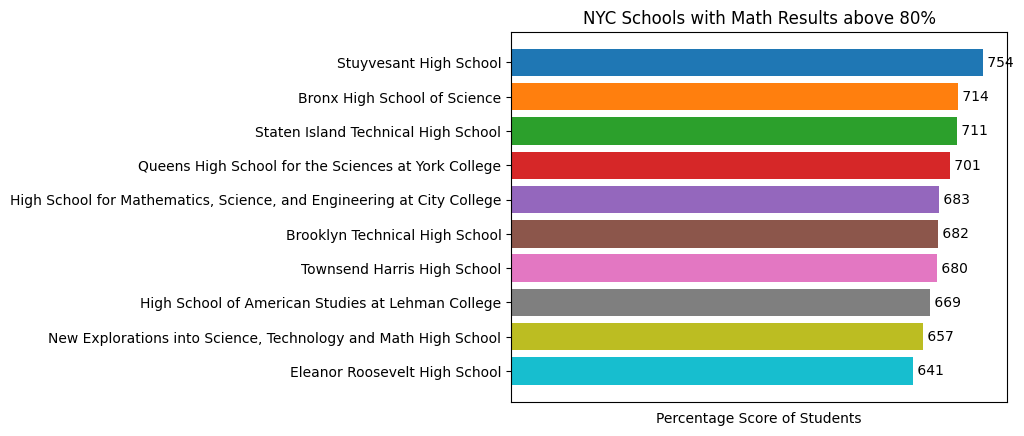

In [226]:
# Filtering and sorting school names with an average math percentage of 80% and above
best_math_schools = schools.loc[schools['average_math'] >= 640, ['school_name', 'average_math']].sort_values('average_math', ascending=False)

# Creating a bar chart for better visualization
for i, (school, score) in enumerate(zip(best_math_schools['school_name'], best_math_schools['average_math'])):
    plt.barh(school, score)
plt.xlabel('Percentage Score of Students')
plt.title('NYC Schools with Math Results above 80%')
plt.gca().invert_yaxis()
plt.xticks([])
for i, score in enumerate(best_math_schools['average_math']):
    plt.text(score, i, f'{score: .0f}', ha='left', va='center')
plt.show()

### What are the top 10 performing schools based on the combined SAT scores?

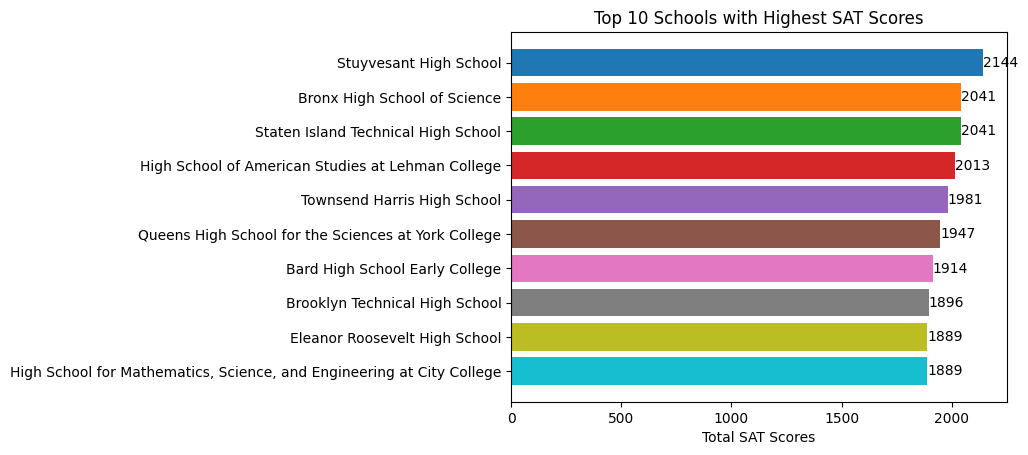

In [227]:
# Combining the average SAT scores (math, reading, writing) in each school
schools['total_SAT'] = schools[['average_math', 'average_reading', 'average_writing']].sum(axis=1)
# print(schools['total_SAT'])
# Sorting the top 10 schools
top_10_schools = schools.loc[:, ['school_name', 'total_SAT']].sort_values('total_SAT', ascending=False).head(10).reset_index(drop=True)
# Replacing index to numbers 1 to 10
top_10_schools.index = range(1, 11)
# print(top_10_schools)

# Creating a bar chart for better visualization
for i, (school, total_sat_score) in enumerate(zip(top_10_schools['school_name'], top_10_schools['total_SAT'])):
    plt.barh(school, total_sat_score)
plt.xlabel('Total SAT Scores')
plt.title('Top 10 Schools with Highest SAT Scores')
plt.gca().invert_yaxis()
for i, total_sat_score in enumerate(top_10_schools['total_SAT']):
    plt.text(total_sat_score, i, f'{total_sat_score:.0f}', ha='left', va='center')
plt.show()

### Which single borough has the largest standard deviation in the combined SAT score?

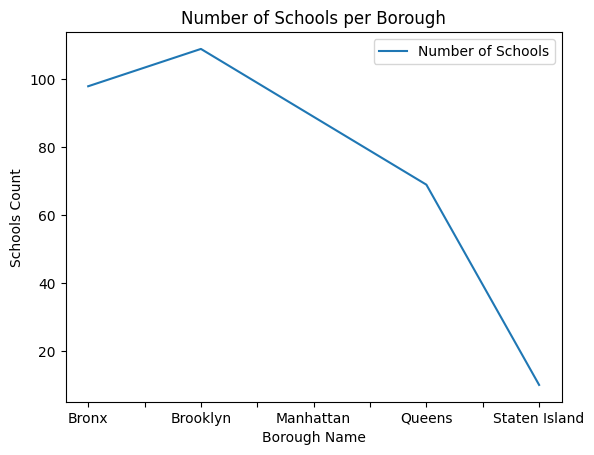

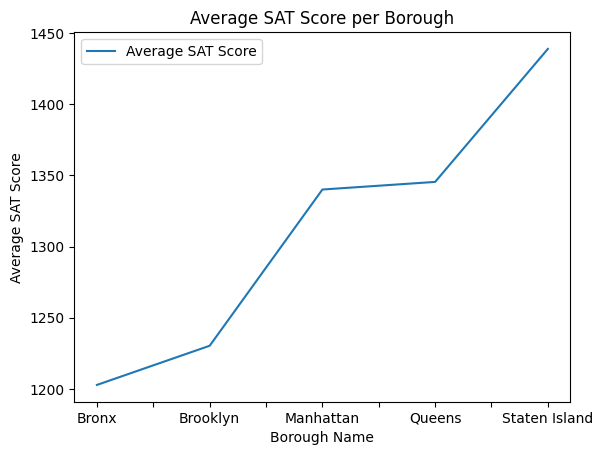

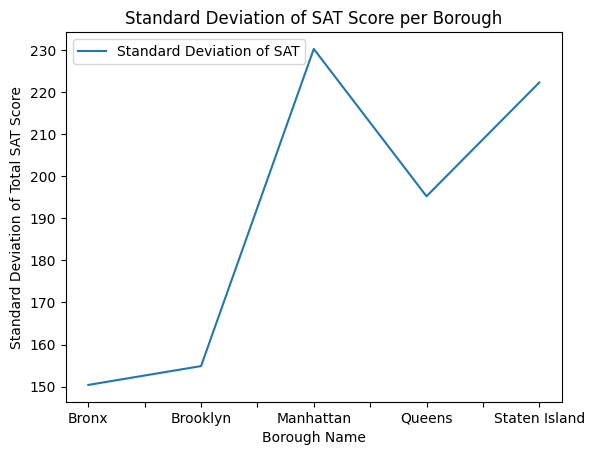

           num_schools  average_SAT  std_SAT
borough                                     
Manhattan           89      1340.13   230.29
The borough that has the largest standard deviation is Manhattan.


In [228]:
# Grouping the data by "borough" and calculating statistics
borough_stats = round(schools.groupby('borough')['total_SAT'].agg(['count', 'mean', 'std']).reset_index(), 2)
# Renaming the columns for clarity
borough_stats.columns = ['borough', 'num_schools', 'average_SAT', 'std_SAT']

# Finding the borough with the largest standard deviation
largest_std_borough = borough_stats.loc[borough_stats['std_SAT'].idxmax()]

# Creating the DataFrame containing the borough with the largest standard deviation
largest_std_dev = pd.DataFrame([largest_std_borough], columns=['borough', 'num_schools', 'average_SAT', 'std_SAT'])
largest_std_dev.set_index('borough', inplace=True)

# Plotting the relationships using line plots
borough_stats.plot(x='borough', y='num_schools', label='Number of Schools')
plt.xlabel("Borough Name")
plt.ylabel("Schools Count")
plt.title("Number of Schools per Borough")
plt.show()

borough_stats.plot(x='borough', y='average_SAT', label='Average SAT Score')
plt.xlabel("Borough Name")
plt.ylabel("Average SAT Score")
plt.title("Average SAT Score per Borough")
plt.show()

borough_stats.plot(x='borough', y='std_SAT', label='Standard Deviation of SAT')
plt.xlabel("Borough Name")
plt.ylabel("Standard Deviation of Total SAT Score")
plt.title("Standard Deviation of SAT Score per Borough")
plt.show()

# Printing the DataFrame containing the largest standard deviation
print(largest_std_dev)
print(f"The borough that has the largest standard deviation is {largest_std_dev.index[0]}.")
